In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading in the Yelp dataset for reviews
Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

In [2]:
df = pd.read_csv('../DATA/archive (1)/yelp_review.csv')

/var/folders/s6/l50_ct1972z4zhwpj0d6jh_m0000gn/T/ipykernel_15233/1021954955.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../DATA/archive (1)/yelp_review.csv')


In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990282 entries, 0 to 6990281
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   object 
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       float64
 6   funny        float64
 7   cool         float64
 8   text         object 
 9   date         object 
dtypes: float64(4), object(6)
memory usage: 533.3+ MB


Since this project is concerned with the text reviews from the yelp dataset, the 'date', 'funny', and 'cool' columns
will be dropped.

In [5]:
df = df.drop('date', axis=1)

In [6]:
df = df.drop('funny', axis=1)
df = df.drop('cool', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990282 entries, 0 to 6990281
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   object 
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       float64
 6   text         object 
dtypes: float64(2), object(5)
memory usage: 373.3+ MB


Here we are checking and removing the empty/null entries

In [8]:
df.isna().sum()

Unnamed: 0     0
review_id      1
user_id        2
business_id    2
stars          2
useful         2
text           2
dtype: int64

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df[df['review_id'].isna()]

,review_id,user_id,business_id,stars,useful,text
2923303,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[(df['review_id'].isna()) | (df['user_id'].isna()) | (df['business_id'].isna()) | (df['stars'].isna()) | (df['useful']
                                                                                                            .isna())
   | (df['text'].isna()) ]

,review_id,user_id,business_id,stars,useful,text
2923303,NaN,NaN,NaN,NaN,NaN,NaN
2923304,2016-03-21 19:31:55,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop([2923303,2923304])

In [13]:
df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
text           0
dtype: int64

In [7]:
reviews = df[['stars', 'text']]

In [15]:
reviews.head()

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...


In [16]:
reviews.isna().sum()

stars    0
text     0
dtype: int64

In [8]:
label_reviews = df[['stars', 'useful']]

This scatterplot visualizes the quantity of useful reviews that correspond to a star rating

<AxesSubplot:xlabel='stars', ylabel='useful'>

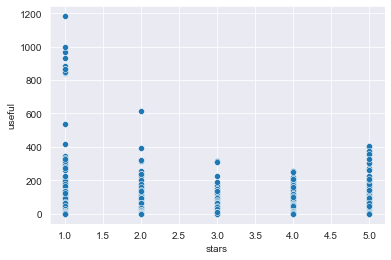

In [18]:
sns.scatterplot(data=label_reviews, x = label_reviews['stars'], y = label_reviews['useful'])

This countplot visualizes the number of reviews for each star rating

<AxesSubplot:xlabel='stars', ylabel='count'>

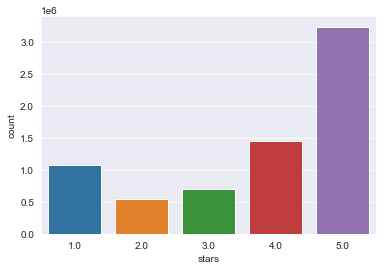

In [19]:
sns.countplot(data=label_reviews, x= label_reviews['stars'])

The libraries that are to be used for the NLP model are imported here.

In this project we are utilizing Count vectorization, A TfidfVectorizer to streamline the process of NLP, as well as
Multinomial Naive Bayes

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [10]:
reviews_short = reviews

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [12]:
X = reviews_short['text']
y = reviews_short['stars']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [38]:
X_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 4893196 entries, 274906 to 3322721
Series name: text
Non-Null Count    Dtype 
--------------    ----- 
4893196 non-null  object
dtypes: object(1)
memory usage: 74.7+ MB


In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
steps = [('tfidf', TfidfVectorizer(stop_words='english')),('nb', MultinomialNB())]
pipe = Pipeline(steps=steps)

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [37]:
preds = pipe.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Classification Report to check the accuracy of the model

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.67      0.79      0.73    320123
         2.0       0.40      0.04      0.07    162987
         3.0       0.32      0.04      0.06    207569
         4.0       0.37      0.23      0.29    436422
         5.0       0.65      0.94      0.77    969983

    accuracy                           0.61   2097084
   macro avg       0.48      0.41      0.38   2097084
weighted avg       0.54      0.61      0.54   2097084



In [45]:
cm_whole = confusion_matrix(y_test, preds)
cm_whole

array([[ 471788,  218891],
       [  62388, 1344017]])

<Figure size 1200x800 with 0 Axes>

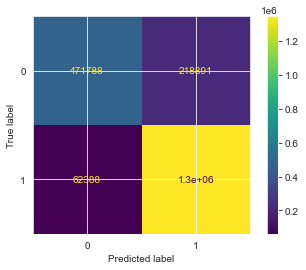

In [46]:
disp_cm_whole = ConfusionMatrixDisplay(confusion_matrix=cm_whole)
disp_cm_whole.plot()

Sample test of the model

In [46]:
pipe.predict(['amazing food but I wanted more', 'It was the worse thing I have ever eaten'])

array([5., 1.])

Testing to see the correlation of a review and it's usefulness to see if useful reviews make the model any more
accurate

In [20]:
useful_reviews = df[df['useful'] == 1]
useful_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1.0,1.0,0.0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
...,...,...,...,...,...,...,...,...,...
6990274,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5.0,1.0,0.0,1.0,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01
6990275,zHZ-A1qyKDEgyZMDaD--wg,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg,5.0,1.0,0.0,0.0,We redesigned my moms dress and mad it complet...,2022-01-17 20:59:01
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30


In [21]:
c_vec = CountVectorizer(stop_words='english')

In [22]:
reviews = useful_reviews[['stars', 'text']]
c_vec.fit(reviews['text'])

CountVectorizer(stop_words='english')

Here we are checking the top 20 words associated with the particular star rating.
For example: the top 20 words associated with a 5 star review

In [50]:
matrix_5_stars = c_vec.transform(reviews[reviews['stars'] == 5]['text'])
freqs = zip(c_vec.get_feature_names_out(), matrix_5_stars.sum(axis=0).tolist()[0])
five_stars_top_20 = sorted(freqs, key=lambda x: -x[1])[:20]
print(five_stars_top_20)


[('great', 384395), ('place', 311875), ('food', 298246), ('good', 251909), ('time', 196610), ('service', 194034), ('best', 171926), ('just', 166518), ('like', 157144), ('ve', 145979), ('amazing', 143699), ('love', 143402), ('delicious', 141823), ('really', 137714), ('friendly', 132443), ('staff', 126254), ('definitely', 115787), ('nice', 108561), ('got', 107424), ('recommend', 105459)]


In [51]:
matrix_4_stars = c_vec.transform(reviews[reviews['stars'] == 4]['text'])
freqs = zip(c_vec.get_feature_names_out(), matrix_4_stars.sum(axis=0).tolist()[0])
four_stars_top_20 = sorted(freqs, key=lambda x: -x[1])[:20]
print(four_stars_top_20)


[('good', 250674), ('food', 189924), ('great', 183775), ('place', 173889), ('like', 122364), ('really', 107056), ('just', 106317), ('time', 105053), ('service', 99754), ('nice', 89419), ('little', 75877), ('ve', 71328), ('got', 69553), ('delicious', 68811), ('ordered', 64663), ('chicken', 64320), ('definitely', 63918), ('menu', 61180), ('try', 60471), ('friendly', 59808)]


In [52]:
matrix_3_stars = c_vec.transform(reviews[reviews['stars'] == 3]['text'])
freqs = zip(c_vec.get_feature_names_out(), matrix_3_stars.sum(axis=0).tolist()[0])
three_stars_top_20 = sorted(freqs, key=lambda x: -x[1])[:20]
print(three_stars_top_20)


[('good', 130095), ('food', 114033), ('place', 84688), ('just', 79212), ('like', 76966), ('service', 60104), ('time', 56049), ('great', 55839), ('really', 55499), ('ordered', 42471), ('nice', 42065), ('got', 39240), ('pretty', 38145), ('don', 36128), ('little', 35988), ('didn', 35313), ('order', 34116), ('ve', 33468), ('chicken', 32589), ('came', 31803)]


In [53]:
matrix_2_stars = c_vec.transform(reviews[reviews['stars'] == 2]['text'])
freqs = zip(c_vec.get_feature_names_out(), matrix_2_stars.sum(axis=0).tolist()[0])
two_stars_top_20 = sorted(freqs, key=lambda x: -x[1])[:20]
print(two_stars_top_20)


[('food', 94432), ('good', 69481), ('just', 64916), ('place', 60798), ('like', 60761), ('service', 52265), ('time', 50811), ('ordered', 39169), ('really', 36683), ('order', 34234), ('got', 34131), ('didn', 32999), ('don', 31694), ('came', 30369), ('great', 29431), ('did', 28086), ('ve', 25766), ('better', 25470), ('minutes', 25116), ('restaurant', 24897)]


In [54]:
matrix_1_stars = c_vec.transform(reviews[reviews['stars'] == 1]['text'])
freqs = zip(c_vec.get_feature_names_out(), matrix_1_stars.sum(axis=0).tolist()[0])
one_stars_top_20 = sorted(freqs, key=lambda x: -x[1])[:20]
print(one_stars_top_20)

[('food', 117707), ('service', 101327), ('just', 98950), ('time', 98244), ('place', 96823), ('like', 84236), ('said', 77752), ('told', 76532), ('order', 69823), ('don', 65670), ('got', 61683), ('didn', 60050), ('did', 58188), ('asked', 57178), ('minutes', 56545), ('good', 55551), ('went', 52678), ('ordered', 51178), ('came', 50679), ('people', 47363)]


In [23]:
X = reviews['text']
y = reviews['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
steps = [('tfidf', TfidfVectorizer(stop_words='english')), ('nb', MultinomialNB())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [25]:
preds = pipe.predict(X_test)

Here we see that only using the useful reviews makes our model slightly less accurate

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.69      0.77      0.73     70733
         2.0       0.44      0.01      0.03     37443
         3.0       0.30      0.01      0.02     47577
         4.0       0.35      0.20      0.25     99516
         5.0       0.61      0.96      0.75    206717

    accuracy                           0.59    461986
   macro avg       0.48      0.39      0.36    461986
weighted avg       0.52      0.59      0.50    461986



Sample test of the model after filtering my review usefulness

In [59]:
pipe.predict(['The line was so long, and when I was finally seated, the waitress forgot about us and cussed us out'])

array([1.])

The final model will be trained to the entire dataset regardless of usefulness

In [60]:
final_model = pipe.fit(df['text'], df['stars'])

In [61]:
final_model.predict(["I never want to eat here again"])

array([5.])

Exporting the final model

In [62]:
import joblib

In [63]:
joblib.dump(final_model, 'yelp_review_model.pkl')

['yelp_review_model.pkl']

In [64]:
loaded_model = joblib.load('yelp_review_model.pkl')

In [65]:
loaded_model.predict(["Wedge fries were super saturated with oil. Tried to send them back and waiter attempted to "
                      "gaslight me into believing that it was normal due to the manner they were processed for "
                      "cooking.  Whatever! I insisted that I was unhappy with the order and finally he relented and "
                      "brought me a second order which were an improvement but by then, I had finished my sandwich.  Ugh. Don't appreciate having to make my case over why I won't consume poor quality food to the waiter."])[0]

1.0

In [66]:
df.head()

,review_id,user_id,business_id,stars,useful,text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,Cute interior and owner (?) gave us tour of up...


ADDING A SENTIMENT MODEL TO PREDICT THE SENTIMENT OF A REVIEW

This function classifies a review as being positive or negative based on its star rating.
1-3 stars are negative
4-5 stars are postive

In [27]:
def sentiments(stars):
  neg = {1,2,3}
  pos = {4,5}
  if stars in neg:
    return 'neg'
  else:
    return 'pos'

In [28]:
def starts_to_sentiment(df):
  df  = df.drop('review_id', axis = 1)
  df = df.drop('user_id', axis = 1)
  neg = {1,2,3}
  pos = {4,5}

  df['sentiment'] = df['stars'].apply(lambda x: sentiments(x))
  return df


In [29]:
test = starts_to_sentiment(df)
test.head()

,business_id,stars,useful,funny,cool,text,date,sentiment
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,neg
1,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,pos
2,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,neg
3,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,pos
4,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,pos


In [47]:
X = test['text']
y = test['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
test_model = pipe.fit(X_train, y_train)

In [31]:
test_preds = test_model.predict(X_test)

Checking the accuracy of the review sentiment model

In [32]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         neg       0.88      0.68      0.77    690679
         pos       0.86      0.96      0.91   1406405

    accuracy                           0.87   2097084
   macro avg       0.87      0.82      0.84   2097084
weighted avg       0.87      0.87      0.86   2097084



In [48]:
cm = confusion_matrix(y_test, test_preds)
cm

array([[ 471788,  218891],
       [  62388, 1344017]])

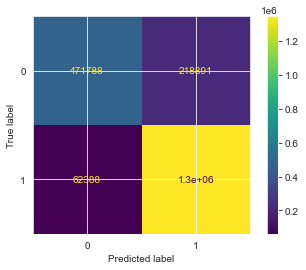

In [49]:
disp_sent = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_sent.plot()

In [78]:
final_sentiment_model = pipe.fit(X, y)

In [80]:
final_sentiment_model.predict(["Wedge fries were super saturated with oil. Tried to send them back and waiter attempted to "
                      "gaslight me into believing that it was normal due to the manner they were processed for "
                      "cooking.  Whatever! I insisted that I was unhappy with the order and finally he relented and "
                      "brought me a second order which were an improvement but by then, I had finished my sandwich.  "
                               "Ugh. Don't appreciate having to make my case over why I won't consume poor quality "
                               "food to the waiter."])[0]

'neg'

In [83]:
final_sentiment_model.predict(["I had cleaners from Caroline's cleaning today and I was so impressed! I usually have to touch up corners and remove streaks but not today!! It was so well done, corner to corner!! And smells great too! Now I can finally relax on a day off. And yes, I will be hiring them again!"])

array(['pos'], dtype='<U3')

Exporting the Sentiment Review Model

In [84]:
joblib.dump(final_sentiment_model, 'yelp_review_sentiment_model.pkl')

['yelp_review_sentiment_model.pkl']

In [85]:
mdl = joblib.load('yelp_review_sentiment_model.pkl')

In [86]:
mdl.predict(["Caroline is very responsive with communication. Her team of 2 did a great job of cleaning my parents home which has never been thoroughly and professionally cleaned. My mom was happy with how clean her kitchen was.  I got several quotes and her price was most reasonable.  I will most definitely use them again."])

array(['pos'], dtype='<U3')